In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv('UKretail.csv',sep=",", encoding='ISO-8859-1')


   ### Initial Insight , determining the number of columns and transactional details

In [3]:

np.shape(data)
print(data.shape)
data.head()

(325145, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:02,7.65,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:02,2.55,17850.0,United Kingdom
4,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:02,1.85,17850.0,United Kingdom


   ### Determining the datatypes of each column from timeseries prespective 

In [4]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

   ### Converting InvoiceDate to Datetime , for analysis convinence 

In [5]:

data.InvoiceDate = pd.to_datetime(data.InvoiceDate)
print(data.dtypes)
data.head()

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:02,7.65,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
2,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:02,3.39,17850.0,United Kingdom
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:02,2.55,17850.0,United Kingdom
4,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:02,1.85,17850.0,United Kingdom


### Drop NAN

In [6]:

data.dropna(how='any' , inplace=True)

### Sort values via date

In [7]:

data.sort_values(by='InvoiceDate' , inplace=True)

In [8]:
cleanedData = data[~(data.InvoiceNo.str.match('(C.*)').str.len() > 0)]

In [9]:
print("Data shape ",np.shape(cleanedData))
print("Orignal Custormers :", len(cleanedData.CustomerID.unique()))
print("Unique Saled Products : ", len(cleanedData.StockCode.unique()))
print("Sales Country : ", len(cleanedData.Country.unique()))


Data shape  (238801, 8)
Orignal Custormers : 4291
Unique Saled Products :  3573
Sales Country :  37


### multiplying unit price with quantity to determine each transactional price 

In [10]:
cleanedData["TransactionalPrice"] = cleanedData.UnitPrice * cleanedData.Quantity

### For the time Analysis using , more options have been name avaliable in Months , weekDay 

In [11]:
cleanedData['Month'] = cleanedData.InvoiceDate.dt.month
cleanedData['WeekDay']=cleanedData.InvoiceDate.dt.weekday

In [12]:
cleanedData.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TransactionalPrice', 'Month',
       'WeekDay'],
      dtype='object')

In [13]:
cleanedData.WeekDay.unique()

array([2, 3, 4, 6, 0, 1])

### First Start with weekely Sale Analysis 

In [14]:
weekDaySales = cleanedData.groupby("WeekDay").sum()
weekDaySales.drop(["CustomerID","Month"] , axis=1 , inplace=True)
weekDaySales.columns

Index(['Quantity', 'UnitPrice', 'TransactionalPrice'], dtype='object')

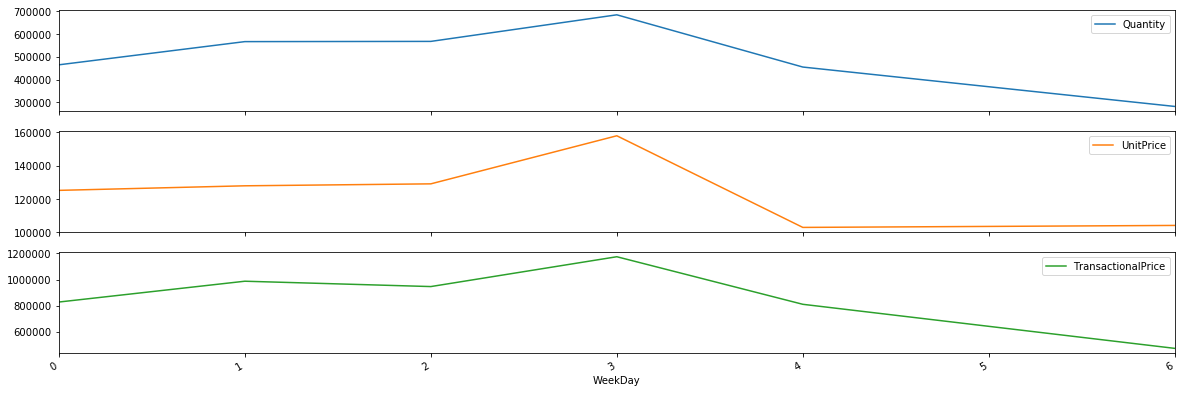

In [15]:
weekDaySales.plot(subplots=True , figsize=(20,7))
plt.show()

### Monthly Sales Analysis 

In [16]:
monthlySales = cleanedData.groupby('Month').sum()

monthlySales.drop(["CustomerID","WeekDay"], axis=1 , inplace=True)

monthlySales.columns

Index(['Quantity', 'UnitPrice', 'TransactionalPrice'], dtype='object')

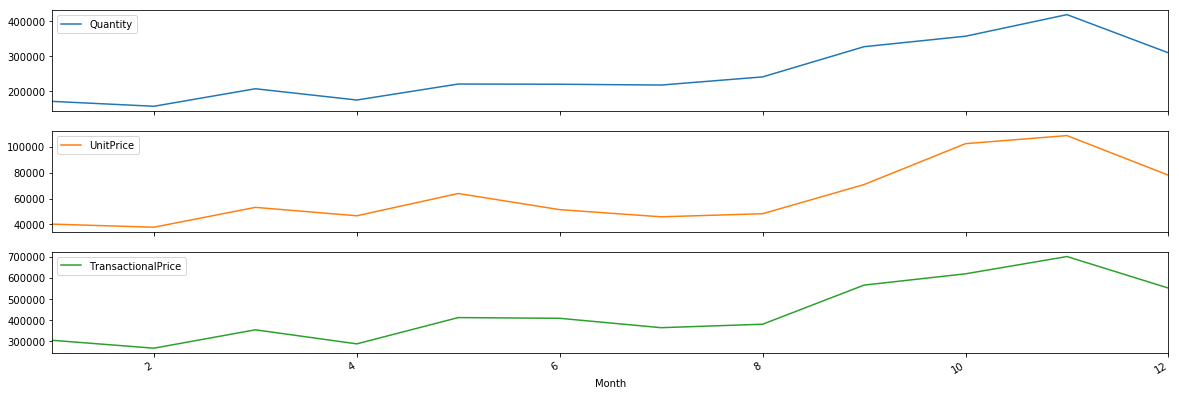

In [17]:
monthlySales.plot(subplots=True , figsize=(20,7))
plt.show()

### Quarterly Sales Analysis 

In [18]:
cleanedData['Quarter']=cleanedData.InvoiceDate.dt.quarter
QuarterlySales = cleanedData.groupby('Quarter').sum()
QuarterlySales.drop(["CustomerID","Month","WeekDay"], axis=1 , inplace=True)
cleanedData.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TransactionalPrice', 'Month',
       'WeekDay', 'Quarter'],
      dtype='object')

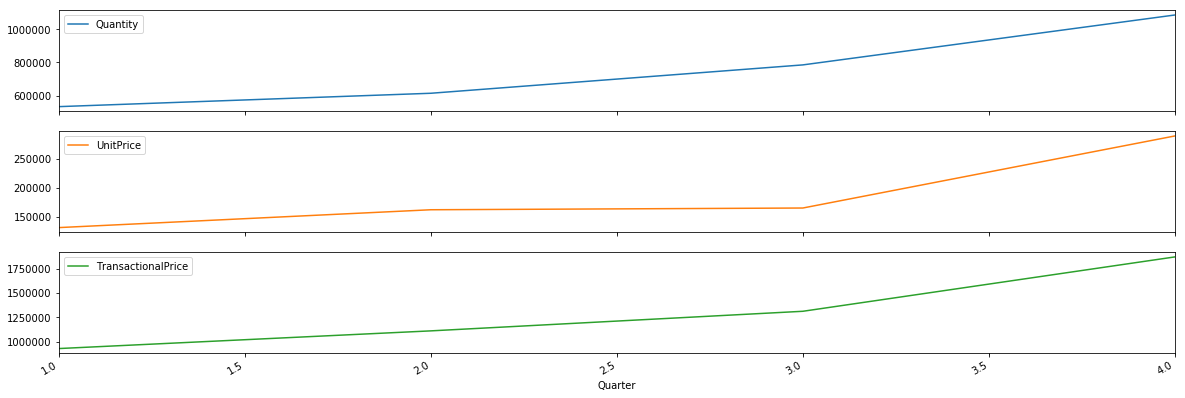

In [19]:
QuarterlySales.plot(subplots=True , figsize=(20,7))
plt.show()

### Now we will move towards the customer direction , first droping the useless columns

In [20]:
customerData = cleanedData.copy()

In [21]:
customerData.drop(["Month","WeekDay","Quarter"] , axis=1 ,inplace=True)

In [22]:

customerData['DayOfYear'] = customerData.InvoiceDate.dt.dayofyear 
customerData.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TransactionalPrice',
       'DayOfYear'],
      dtype='object')

### See the daily sales of all customers 

Index(['Quantity', 'UnitPrice', 'CustomerID', 'TransactionalPrice'], dtype='object')


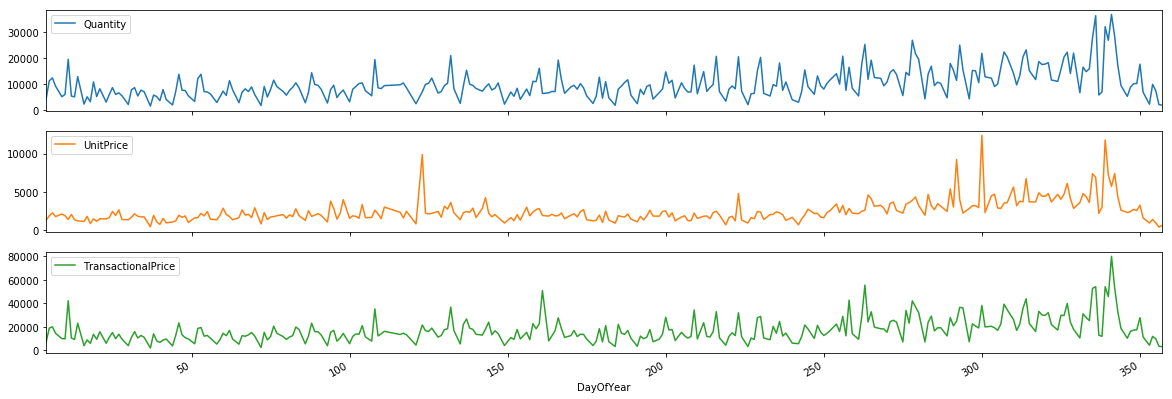

In [23]:
cusData = customerData.groupby(['DayOfYear']).sum()

%matplotlib inline
print(cusData.columns)
cusData.drop( ['CustomerID'], axis = 1, inplace=True)
cusData.plot(subplots=True ,y=['Quantity','UnitPrice','TransactionalPrice'], figsize=(20,7))
plt.show()

#temp = customerData.groupby(["InvoiceNo","CustomerID","InvoiceDate"]).sum()

In [24]:
cleanedData.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TransactionalPrice', 'Month',
       'WeekDay', 'Quarter'],
      dtype='object')

### Now subsetting the data each unique No , along with the date and customer , 
### such that we would have combined purchase order under each user in their individual ### time

In [25]:
newArr = []
itm = cleanedData.groupby(["InvoiceNo" , "InvoiceDate","CustomerID"]).sum()

#for i in itm:
#    print(type(i))
    #x = pd.DataFrame(i).groupby("CustomerID").sum()
    #print(x.columns)
#cleanedData.groupby(["InvoiceNo" , "InvoiceDate"]).apply(groupby("CustomerID"))

In [26]:
itm.reset_index(inplace=True)
##itm.drop("index", inplace=True, axis=1)
itm.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,UnitPrice,TransactionalPrice,Month,WeekDay,Quarter
0,536365,2010-12-01 08:26:02,17850.0,20,16.98,71.28,48,8,16
1,536366,2010-12-01 08:28:02,17850.0,6,1.85,11.10,12,2,4
2,536367,2010-12-01 08:33:59,13047.0,40,37.40,164.40,96,16,32
3,536368,2010-12-01 08:33:59,13047.0,6,9.90,29.70,24,4,8
4,536370,2010-12-01 08:45:02,12583.0,279,43.65,607.80,144,24,48


In [27]:
print("Printing the Unique Customers ", len(itm.CustomerID.unique()))
print("Shape of combined dateset",itm.shape)

Printing the Unique Customers  4291
Shape of combined dateset (17809, 9)


## Lets do prediction from Here , just for testing from about data 

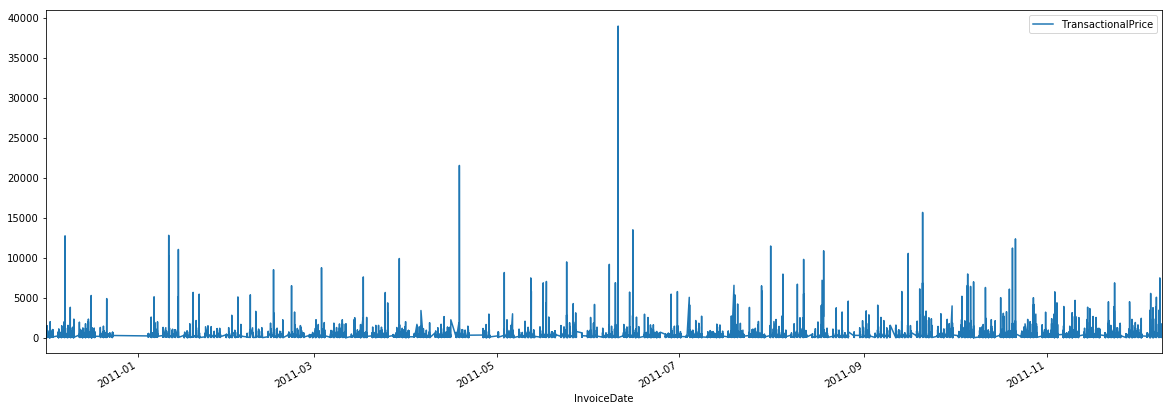

In [28]:
itm.plot(x="InvoiceDate",y="TransactionalPrice", figsize=(20,7))
plt.show()

## Filter Data of based on Single Customer , 

### Quaterly , Monthly and Weekly intensity of Each Customer ID 

In [29]:
itm.drop(["Month","WeekDay","Quarter"], axis = 1 , inplace = True)


In [30]:
itm["Quarter"] = itm.InvoiceDate.dt.quarter
itm["Month"] = itm.InvoiceDate.dt.month
itm["Week"]= itm.InvoiceDate.dt.week
itm.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,UnitPrice,TransactionalPrice,Quarter,Month,Week
0,536365,2010-12-01 08:26:02,17850.0,20,16.98,71.28,4,12,48
1,536366,2010-12-01 08:28:02,17850.0,6,1.85,11.10,4,12,48
2,536367,2010-12-01 08:33:59,13047.0,40,37.40,164.40,4,12,48
3,536368,2010-12-01 08:33:59,13047.0,6,9.90,29.70,4,12,48
4,536370,2010-12-01 08:45:02,12583.0,279,43.65,607.80,4,12,48


### Single Customer purchase Timeline  /// Filter
### Calcualting the index and number of purchase order of all customer 
### If You want to see detail , just uncommect the print statement below 

In [31]:
lenOfEachInvoices = []

for i in np.arange(0,itm.shape[0]):
    lenOfEachInvoices.append(len(itm[itm.CustomerID == itm["CustomerID"][i]]))
    #print(i , " ",len(itm[itm.CustomerID == itm["CustomerID"][i]]))

maxIndex = np.argmax(lenOfEachInvoices)

In [32]:
maxIndex

52

### Slection the customer with max purchase order 
### e.g. selecting the index number 71 , who has purchase order of 198

In [33]:
singleUser = itm[itm.CustomerID == itm["CustomerID"][maxIndex]]

In [34]:
singleUser.shape

(201, 9)

In [35]:
singleUser.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,UnitPrice,TransactionalPrice,Quarter,Month,Week
52,536521,2010-12-01 12:47:59,12748.0,1,4.95,4.95,4,12,48
143,536641,2010-12-02 11:45:59,12748.0,1,4.25,4.25,4,12,48
324,537136,2010-12-05 12:42:04,12748.0,82,55.12,115.26,4,12,48
328,537140,2010-12-05 12:53:03,12748.0,22,32.58,33.88,4,12,48
330,537142,2010-12-05 12:56:59,12748.0,6,16.00,16.00,4,12,48


In [36]:
singleUser["DayOfYear"] = singleUser.InvoiceDate.dt.dayofyear

In [37]:
singleUser.reset_index(inplace=True, drop=True)
singleUser.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,UnitPrice,TransactionalPrice,Quarter,Month,Week,DayOfYear
0,536521,2010-12-01 12:47:59,12748.0,1,4.95,4.95,4,12,48,335
1,536641,2010-12-02 11:45:59,12748.0,1,4.25,4.25,4,12,48,336
2,537136,2010-12-05 12:42:04,12748.0,82,55.12,115.26,4,12,48,339
3,537140,2010-12-05 12:53:03,12748.0,22,32.58,33.88,4,12,48,339
4,537142,2010-12-05 12:56:59,12748.0,6,16.00,16.00,4,12,48,339


In [38]:
saleIntesityQuarter = singleUser.groupby("Quarter").size()
saleIntensityWeek = singleUser.groupby("Week").size()
#print(saleIntensityWeek)
saleIntensityMonth = singleUser.groupby("Month").size()

In [39]:
print( "Weekly Intensity ", sum(saleIntensityWeek) / 7)
print( "Monthly Intensity ",sum(saleIntensityMonth) / 12)
print( "Quarter Intensity", sum(saleIntesityQuarter) / 4)

Weekly Intensity  28.7142857143
Monthly Intensity  16.75
Quarter Intensity 50.25


### As this person has large number of purchase orders , So weekly analysis is better , remembering the window size of 28 ,
### First a plot view 

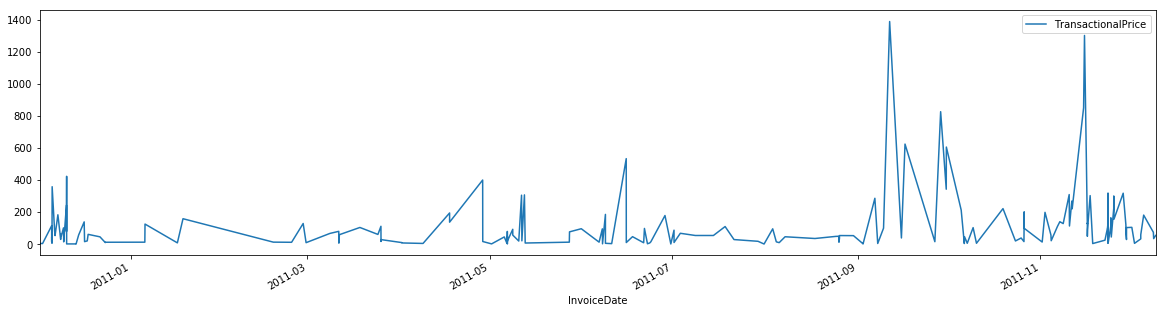

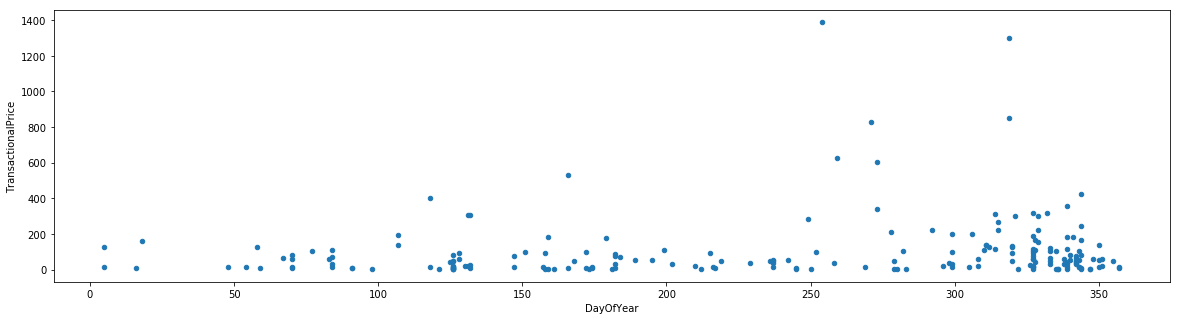

In [40]:
singleUser.plot(x="InvoiceDate",y="TransactionalPrice" ,   figsize=(20,5))
singleUser.plot(x="DayOfYear", y="TransactionalPrice", kind="scatter", figsize=(20,5))
plt.show()

  ## Triple exponential smoothing 

In [41]:
def initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen

In [42]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals

In [43]:
def triple_exponential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series)+n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m*trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha*(val-seasonals[i%slen]) + (1-alpha)*(smooth+trend)
            trend = beta * (smooth-last_smooth) + (1-beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1-gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [44]:
OneLess = singleUser.copy()
OneLess.drop(OneLess.tail(1).index,inplace = True)

In [45]:
OneLess.shape

(200, 10)

### Selection the weekly intesity value , 28.7 => 29 as window size

In [46]:
x = list((triple_exponential_smoothing(list(OneLess.TransactionalPrice), 29, 0.716, 0.029, 0.993, 1)))

In [47]:
len(x)

201

In [48]:
x[-1]

62.624799660596956

In [49]:
list(singleUser.TransactionalPrice)[-1]

54.800000000000018

In [50]:
singleUser["Predicted"] = x 

### As this graph would show neat accuracy , only in the case where you would have lot amount of to make the analysis more predictable 

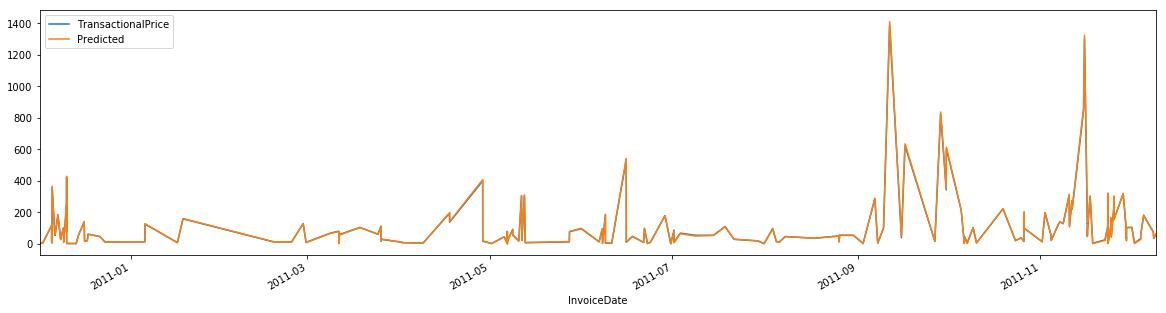

In [51]:

singleUser.plot(x="InvoiceDate",y=["TransactionalPrice","Predicted"] , figsize=(20,5))
#singleUser.plot(x="InvoiceDate", y="Predicted" , figsize=(20,5), color="red" )
plt.show()

## Arima Model 


In [52]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [53]:
ts = singleUser.copy()
ts.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice',
       'TransactionalPrice', 'Quarter', 'Month', 'Week', 'DayOfYear',
       'Predicted'],
      dtype='object')

In [54]:
ts.drop(["InvoiceNo","CustomerID","Quantity","UnitPrice","Quarter","Month","Week","DayOfYear", "Predicted"], axis=1,inplace=True)

In [55]:
ts.columns

Index(['InvoiceDate', 'TransactionalPrice'], dtype='object')

In [56]:
indexed_df = ts.set_index("InvoiceDate")

### the series in the format where it is suitable for arima model 

In [57]:
## making date as index of series

ts = indexed_df["TransactionalPrice"]
ts.head(5)

InvoiceDate
2010-12-01 12:47:59      4.95
2010-12-02 11:45:59      4.25
2010-12-05 12:42:04    115.26
2010-12-05 12:53:03     33.88
2010-12-05 12:56:59     16.00
Name: TransactionalPrice, dtype: float64

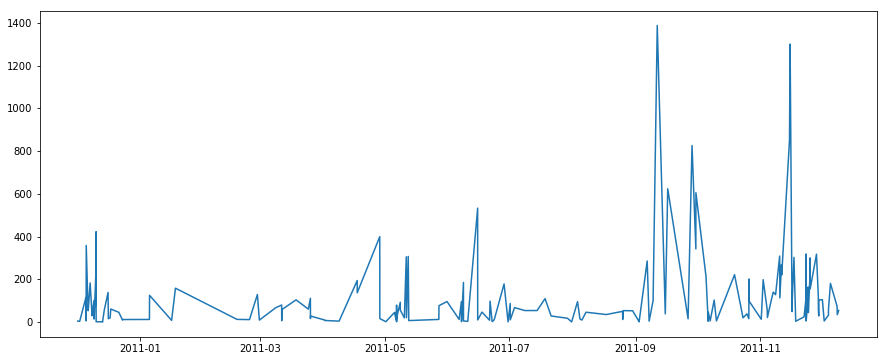

In [58]:
plt.plot(ts)

In [59]:
def test_stationarity(timeseries):
    
    # set the rolling window to 15 cosidering last 15 values window
    rolmean = timeseries.rolling(window=15,center=False).mean() 
    rolstd = timeseries.rolling(window=15,center=False).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

### Testing weather the Time series is stationary or not , which is not 
### so we can jump to making to model parameters 

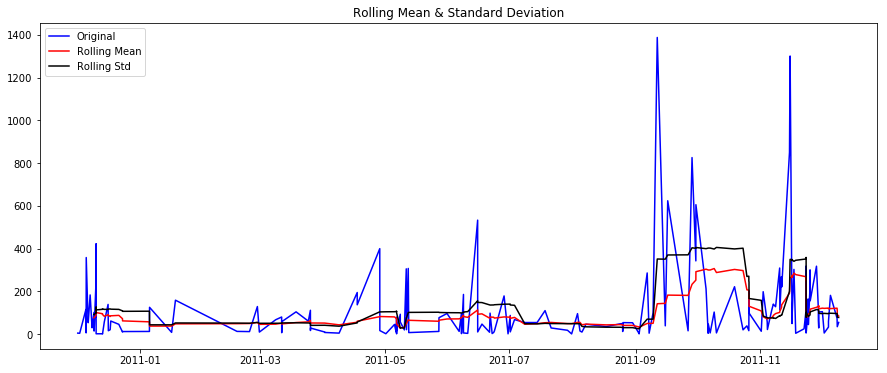

Results of Dickey-Fuller Test:
Test Statistic                -6.889552e+00
p-value                        1.366772e-09
#Lags Used                     1.000000e+00
Number of Observations Used    1.990000e+02
Critical Value (1%)           -3.463645e+00
Critical Value (5%)           -2.876176e+00
Critical Value (10%)          -2.574572e+00
dtype: float64


In [60]:
test_stationarity(ts)

### scale it down to log series 

In [61]:


ts_log = np.log(ts)

### Vosiualizing in low scale version of stationary 

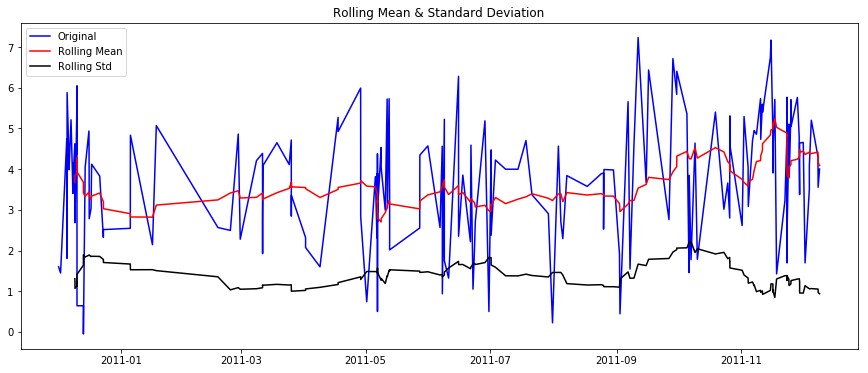

Results of Dickey-Fuller Test:
Test Statistic                -7.868109e+00
p-value                        5.070228e-12
#Lags Used                     1.000000e+00
Number of Observations Used    1.990000e+02
Critical Value (1%)           -3.463645e+00
Critical Value (5%)           -2.876176e+00
Critical Value (10%)          -2.574572e+00
dtype: float64


In [62]:


test_stationarity(ts_log)

### Log difference for evaluating the model parameter

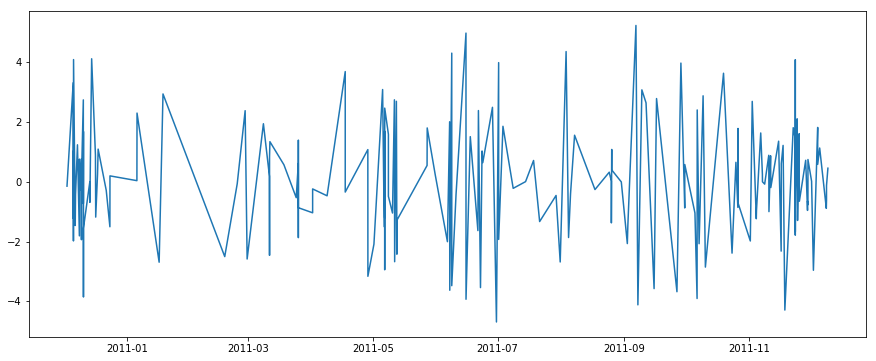

In [63]:
 

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

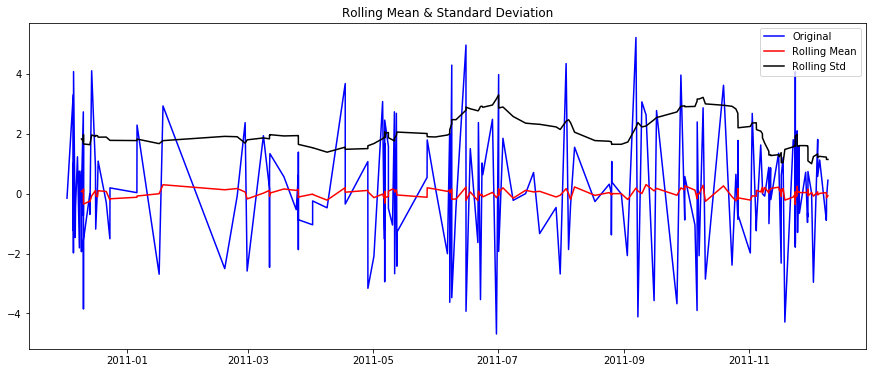

Results of Dickey-Fuller Test:
Test Statistic                -8.083795e+00
p-value                        1.437806e-12
#Lags Used                     7.000000e+00
Number of Observations Used    1.920000e+02
Critical Value (1%)           -3.464875e+00
Critical Value (5%)           -2.876714e+00
Critical Value (10%)          -2.574859e+00
dtype: float64


In [64]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### determining of acf and pacf for the model 
### as p and q 

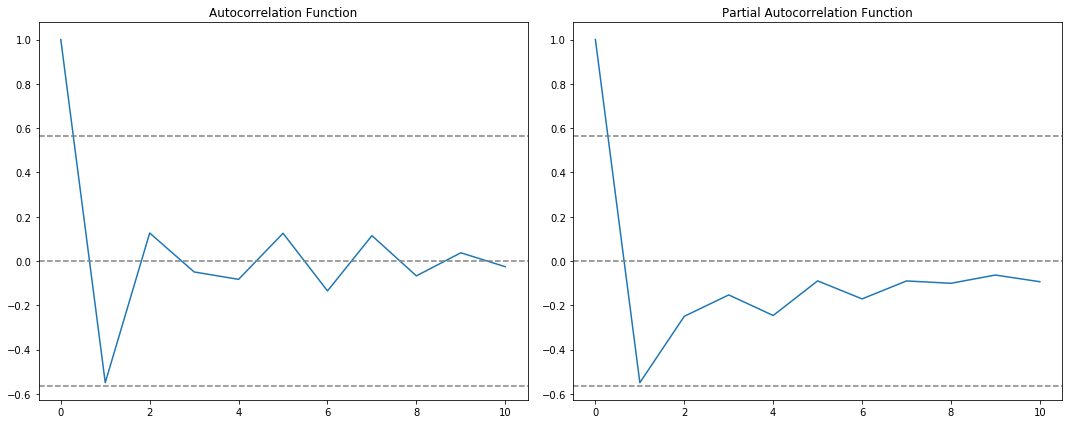

In [65]:

lag_acf = acf(ts_log_diff, nlags=10)

lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-7.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=7.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

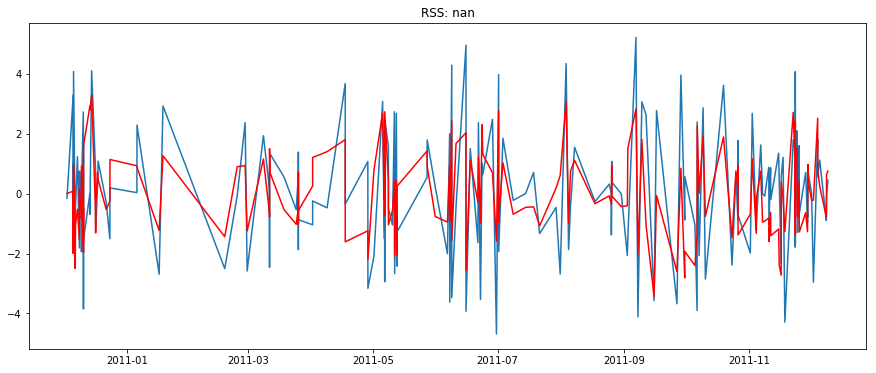

In [66]:

model = ARIMA(ts_log, order=(1 ,1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log)**2))

                              ARIMA Model Results                               
Dep. Variable:     D.TransactionalPrice   No. Observations:                  200
Model:                   ARIMA(1, 1, 1)   Log Likelihood                -357.855
Method:                         css-mle   S.D. of innovations              1.438
Date:                  Tue, 17 Oct 2017   AIC                            723.709
Time:                          18:16:56   BIC                            736.903
Sample:                      12-02-2010   HQIC                           729.049
                           - 12-09-2011                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0055      0.004      1.434      0.153      -0.002       0.013
ar.L1.D.TransactionalPrice     0.0558      0.082      0.680      0.

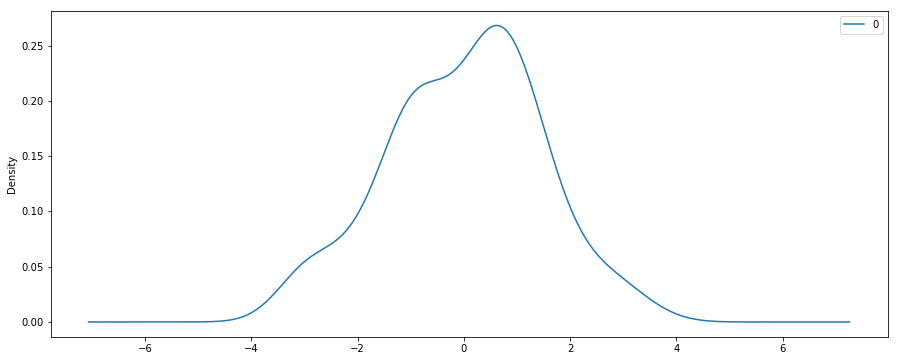

In [67]:

print(results_ARIMA.summary())
# plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
residuals.plot(kind='kde')
print(residuals.describe())

In [68]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

InvoiceDate
2010-12-02 11:45:59    0.005549
2010-12-05 12:42:04    0.080122
2010-12-05 12:53:03   -1.996917
2010-12-05 12:56:59   -0.647632
2010-12-05 13:05:01    0.045853
dtype: float64


In [69]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

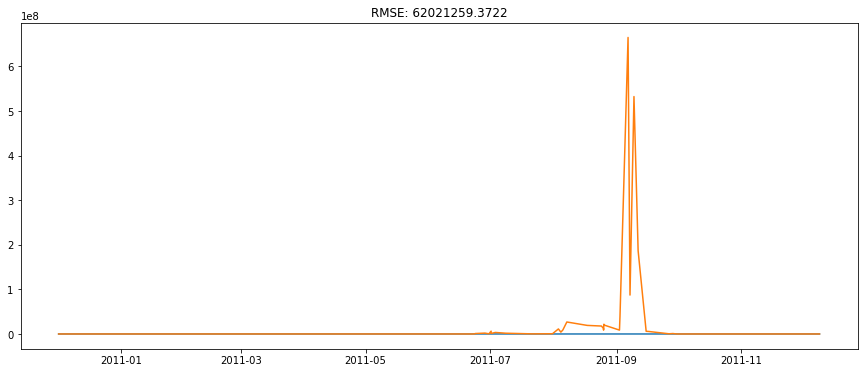

In [70]:

predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [71]:
size = int(len(ts_log) - 15)
train, test = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train]
predictions = list()

print('Printing Predicted vs Expected Values...')
print('\n')
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (np.exp(yhat), np.exp(obs)))

error = mean_squared_error(test, predictions)

print('\n')
print('Printing Mean Squared Error of Predictions...')
print('Test MSE: %.6f' % error)

predictions_series = pd.Series(predictions, index = test.index)

Printing Predicted vs Expected Values...


predicted=87.238420, expected=317.960000
predicted=95.555354, expected=121.580000
predicted=93.542643, expected=63.250000
predicted=90.055107, expected=29.220000
predicted=83.341549, expected=49.660000
predicted=83.866534, expected=103.760000
predicted=87.986621, expected=105.180000
predicted=89.195864, expected=5.450000
predicted=70.371582, expected=33.240000
predicted=74.612066, expected=59.120000
predicted=76.729932, expected=181.510000
predicted=84.279407, expected=74.320000
predicted=80.483969, expected=39.960000
predicted=76.510963, expected=35.020000
predicted=74.391069, expected=54.800000


Printing Mean Squared Error of Predictions...
Test MSE: 0.925162


## Multi Preceptron Layer Testing with data 

In [72]:
singleUser.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'Quantity', 'UnitPrice',
       'TransactionalPrice', 'Quarter', 'Month', 'Week', 'DayOfYear',
       'Predicted'],
      dtype='object')

### creating the dataset 

In [73]:
dataset = pd.DataFrame(singleUser.TransactionalPrice)

In [74]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [82]:
#dataset = np.array(dataset)

In [75]:
train_size = int(len(dataset) * 0.95)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size,:], dataset.iloc[train_size:len(dataset),:]
print(len(train), len(test))

190 11


In [76]:
train = np.array(train)
test = np.array(test)

In [77]:
test

array([[  49.66],
       [ 103.76],
       [ 105.18],
       [   5.45],
       [  33.24],
       [  59.12],
       [ 181.51],
       [  74.32],
       [  39.96],
       [  35.02],
       [  54.8 ]])

In [78]:
# convert an array of values into a dataset matrix using the lookback function 
def reorder_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        #print(dataX)
    return np.array(dataX), np.array(dataY)

In [79]:
## trainX datasets using look back function such that it found the repeating value in 
## differnt columns , treating them as attributes
trainX,trainY = reorder_dataset(train , look_back=2)
trainY

array([  1.15260000e+02,   3.38800000e+01,   1.60000000e+01,
         4.41900000e+01,   6.10000000e+00,   3.58440000e+02,
         8.28200000e+01,   5.37000000e+01,   1.83480000e+02,
         3.00000000e+01,   6.35500000e+01,   4.78500000e+01,
         1.01900000e+02,   1.46500000e+01,   1.59000000e+01,
         2.43310000e+02,   1.65470000e+02,   7.93600000e+01,
         4.23280000e+02,   8.99000000e+00,   1.90000000e+00,
         1.90000000e+00,   9.50000000e-01,   5.73600000e+01,
         1.39200000e+02,   5.28100000e+01,   1.61500000e+01,
         2.08000000e+01,   6.15200000e+01,   4.60500000e+01,
         1.02000000e+01,   1.23500000e+01,   1.27500000e+01,
         1.25600000e+02,   8.52000000e+00,   1.58950000e+02,
         1.30000000e+01,   1.21000000e+01,   1.29170000e+02,
         9.75000000e+00,   6.73000000e+01,   8.02900000e+01,
         6.85000000e+00,   1.56900000e+01,   5.95000000e+01,
         1.04430000e+02,   6.10600000e+01,   1.11750000e+02,
         1.72000000e+01,

In [80]:
testX , testY = reorder_dataset(test, look_back=2)

In [81]:
testX , testY

(array([[  49.66,  103.76],
        [ 103.76,  105.18],
        [ 105.18,    5.45],
        [   5.45,   33.24],
        [  33.24,   59.12],
        [  59.12,  181.51],
        [ 181.51,   74.32],
        [  74.32,   39.96]]),
 array([ 105.18,    5.45,   33.24,   59.12,  181.51,   74.32,   39.96,
          35.02]))

In [82]:
# create and fit Multilayer Perceptron model using three layers 
look_back = 2
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=4, verbose=2)

Epoch 1/200
0s - loss: 42127.1429
Epoch 2/200
0s - loss: 36993.7297
Epoch 3/200
0s - loss: 35147.9169
Epoch 4/200
0s - loss: 34565.3218
Epoch 5/200
0s - loss: 34351.1787
Epoch 6/200
0s - loss: 34092.2214
Epoch 7/200
0s - loss: 34082.9314
Epoch 8/200
0s - loss: 33768.9301
Epoch 9/200
0s - loss: 33962.0627
Epoch 10/200
0s - loss: 33636.6085
Epoch 11/200
0s - loss: 33566.3505
Epoch 12/200
0s - loss: 33677.5832
Epoch 13/200
0s - loss: 33726.9590
Epoch 14/200
0s - loss: 33589.2168
Epoch 15/200
0s - loss: 33746.6152
Epoch 16/200
0s - loss: 33488.8438
Epoch 17/200
0s - loss: 33833.1107
Epoch 18/200
0s - loss: 33852.3859
Epoch 19/200
0s - loss: 33392.4674
Epoch 20/200
0s - loss: 33714.3437
Epoch 21/200
0s - loss: 33422.4556
Epoch 22/200
0s - loss: 33594.0966
Epoch 23/200
0s - loss: 33278.6323
Epoch 24/200
0s - loss: 33423.7171
Epoch 25/200
0s - loss: 33306.0121
Epoch 26/200
0s - loss: 33265.6200
Epoch 27/200
0s - loss: 33305.0696
Epoch 28/200
0s - loss: 33357.7530
Epoch 29/200
0s - loss: 33201

### Estimate model performance

In [83]:

import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 26487.63 MSE (162.75 RMSE)
Test Score: 6529.02 MSE (80.80 RMSE)


### generate predictions for training

In [84]:

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

### Predict Vs Expected 

In [85]:
print ("Predict \t expected ")
for item in zip(testPredict , testY):
    print (item)

Predict 	 expected 
(array([ 58.88588715], dtype=float32), 105.18000000000001)
(array([ 115.9943161], dtype=float32), 5.4500000000000002)
(array([ 46.36069107], dtype=float32), 33.240000000000002)
(array([ 41.4745636], dtype=float32), 59.120000000000005)
(array([ 32.00515747], dtype=float32), 181.50999999999993)
(array([ 153.70585632], dtype=float32), 74.320000000000007)
(array([ 125.18334961], dtype=float32), 39.960000000000008)
(array([ 73.34285736], dtype=float32), 35.020000000000003)


In [86]:
trainX[:5] , " ", trainY[:5] , " ", trainPredict[:5]

(array([[   4.95,    4.25],
        [   4.25,  115.26],
        [ 115.26,   33.88],
        [  33.88,   16.  ],
        [  16.  ,   44.19]]),
 ' ',
 array([ 115.26,   33.88,   16.  ,   44.19,    6.1 ]),
 ' ',
 array([[ 20.09325981],
        [ 37.62769318],
        [ 67.08126831],
        [ 38.86065292],
        [ 45.41672516]], dtype=float32))